In [34]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

model_h5 = "efficientnetb1.hdf5"
model_path = f"모델/saved_models/{model_h5}"
model = load_model(model_path)  
input_size = (224,224)
is_Grey = False

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "데이터셋/한국인 감정인식을 위한 복합 영상/1차데이터셋/test"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale' if is_Grey else "rgb")

Found 10999 images belonging to 7 classes.


In [36]:
import numpy as np
predictions = model.predict(test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes

344/344 [==============================] - 21s 57ms/step


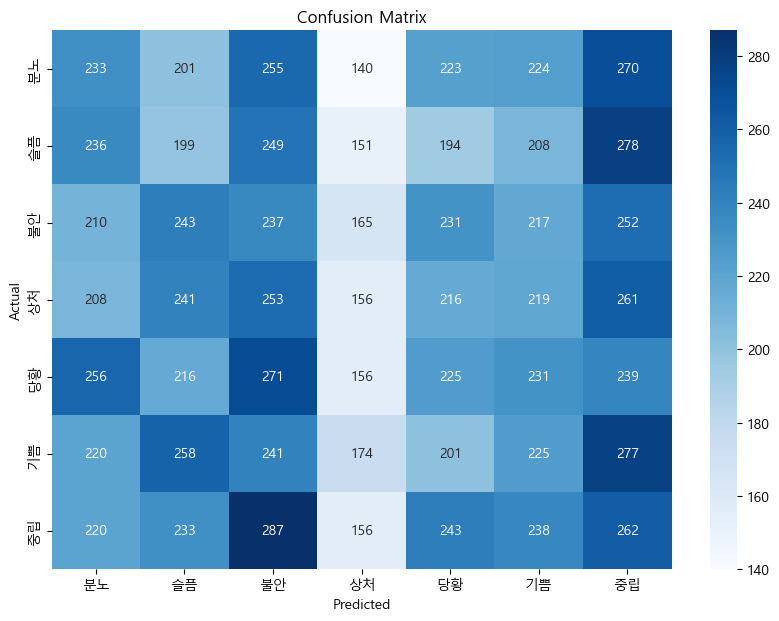

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
emotions_korean = ["분노", "슬픔", "불안", "상처", "당황", "기쁨", "중립"]

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions_korean, yticklabels=emotions_korean)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()